In [41]:
#init

import numpy as np   #numpy lets us do nice vector manipulations
import glob          #access the file system (for searching for files)
import matplotlib.pyplot as plt          #for plotting
from scipy.signal import savgol_filter   #nice filter
import mpld3                             #toolbar for zooming in plots
mpld3.enable_notebook()

In [42]:
#import data


#Load data (all .ASC files in directory)
files=sorted(glob.glob("*.ASC"))

#Get x axis wavenumbers from a file
x = np.loadtxt(files[1], skiprows=25, unpack=True)[0]

n=len(files)            #number of files
m=len(x)             #data length of each spectrum
data=np.ndarray((n,m))  #create nxm array to hold all data

for i in range(n):
    data[i] = np.loadtxt(files[i], skiprows=25, unpack=True)[1]

In [59]:
#Smooth data

sdata=np.ndarray((n,m))   #another array to hold smoothed data

for i in range(n):
    sdata[i]=savgol_filter(data[i],37,3)

In [60]:
#Find peaks (in smoothed data)

peaks=[]

for i in sdata:
    peaks.append(np.argmax(i[1400:1600])+1400)    #find peak

In [65]:
#Normalize

nsdata=np.ndarray((n,m))

for i in range(n):
    tmp=sdata[i]-min(sdata[i])   #subtract minimum
    print(tmp[peaks[i]])
    print(x[peaks[i]])
    nsdata[i]=tmp/tmp[peaks[i]]

2.398295048270403
2600.0
0.06843538342738387
2457.0
0.06962958063558089
2455.0
0.0682861458271462
2456.0
2.41007077827369
2600.0
2.414481245931918
2600.0
0.7238697160677212
2600.0
0.7334681636471672
2600.0
0.06729119423819441
2454.0
0.06791937511137558
2456.0
0.06760905375705406
2454.0
0.06706352658152703
2454.0
0.06767045292545337
2454.0
2.4191486125631503
2600.0
2.427081826536236
2600.0
0.06687840481140517
2455.0
0.06645105494505554
2456.0
0.06645132877932891
2455.0
0.0667482738342744
2455.0
0.06628011969112002
2454.0
0.06590761479061535
2453.0
0.06581287080487108
2456.0
0.06626720908820927
2455.0
0.05439239144639174
2453.0
0.05419493079893101
2454.0
0.05471216988417027
2451.0
0.054872076329076536
2452.0
0.05614083902583933
2451.0
0.05208843480843495
2451.0
0.04575189812889846
2450.0
0.04328272765072805
2451.0
0.04279839679239705
2450.0
0.02941046658746671
2442.0
0.02701157915057939
2435.0
0.028250459162459163
2430.0
0.02795937035937035
2430.0
0.02827798871398879
2423.0
0.02592477101

Text(0.5, 0, 'Wavenumber [per cm]')

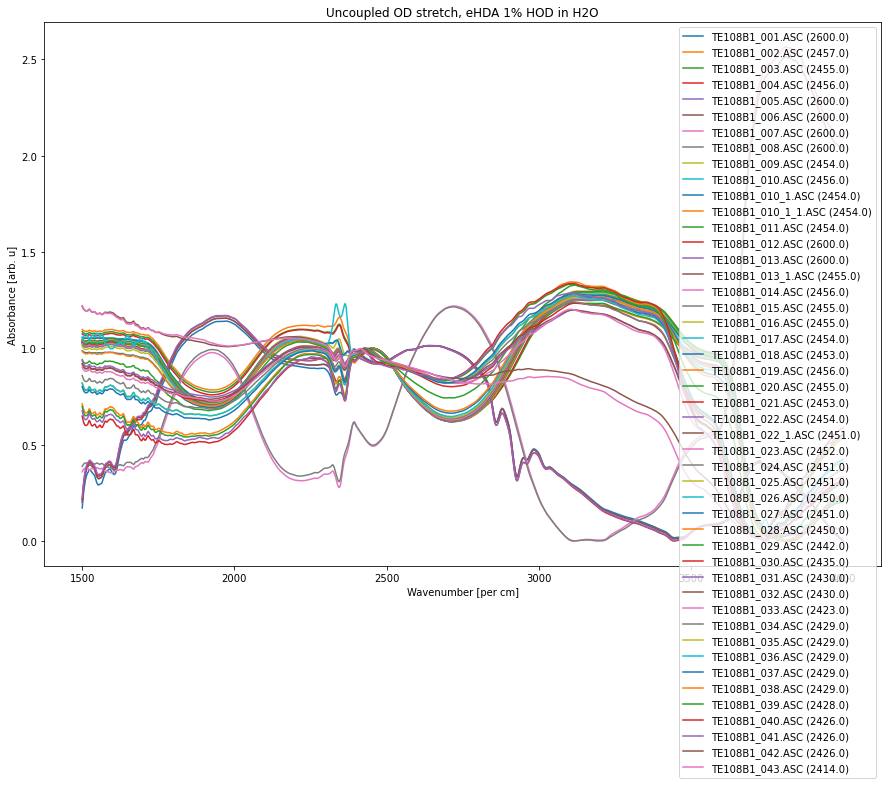

In [69]:
fig=plt.figure(figsize=(15,10))   #creates a figure and sets size

#include=[0,1,2,3,4,7,8,9]       #These spectra will be plotted

legend=[str(files[i])+' (' + str(x[peaks[i]])+')' for i in range(n)]   #Use filenames for legend   
#legend=['80 K', '10000 K', 'etc']   #custom legend

for i in range(n):
    plt.plot(x,nsdata[i], linestyle='-')

plt.legend(legend, loc='upper right')
plt.title('Uncoupled OD stretch, eHDA 1% HOD in H2O')
plt.ylabel('Absorbance [arb. u]')
plt.xlabel('Wavenumber [per cm]')